In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
from sklearn.metrics import mean_squared_error,r2_score


In [3]:
df=pd.read_csv('/content/stocks.csv')
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


DataPreparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [5]:
df.dtypes

,0
Ticker,object
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [7]:
df.isna().any()

,0
Ticker,False
Date,False
Open,False
High,False
Low,False
Close,False
Adj Close,False
Volume,False


In [8]:
df.isnull().sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
#Sort by Date just in case
df = df.sort_values(by='Date')

In [11]:
df['Ticker'].unique()

array(['AAPL', 'MSFT', 'GOOG', 'NFLX'], dtype=object)

In [12]:
df[df['Close'] == df['Adj Close']].shape

(239, 8)

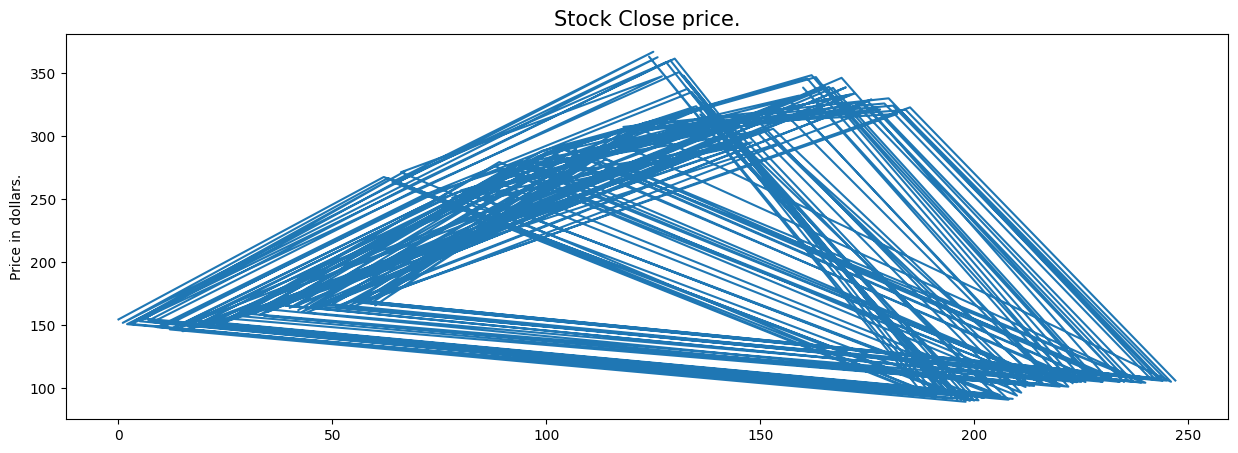

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Stock Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

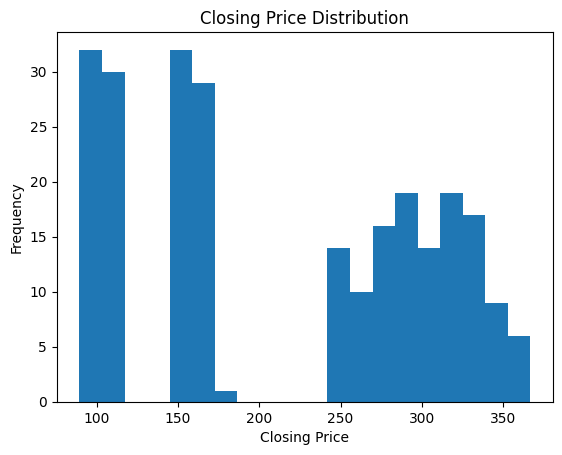

In [14]:
plt.hist(df['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

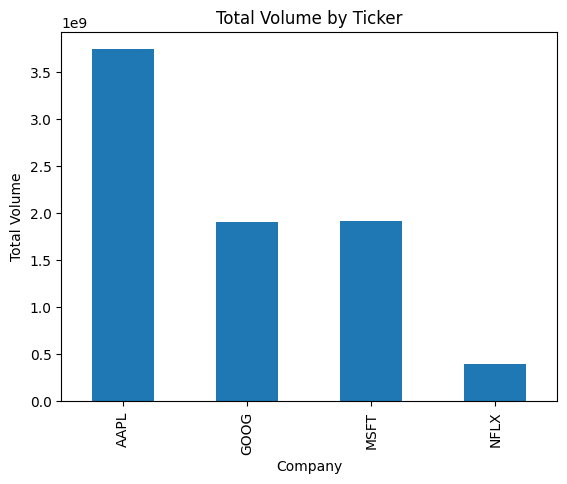

In [15]:

ticker_volume = df.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar', title="Total Volume by Ticker")
plt.xlabel("Company")
plt.ylabel("Total Volume")
plt.show()


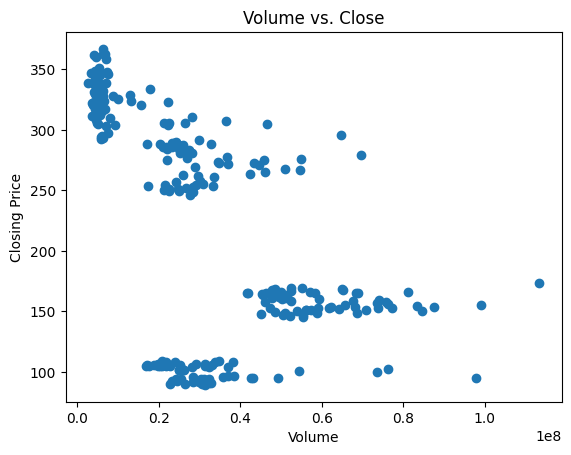

In [16]:
plt.scatter(df['Volume'], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Close')
plt.show()


In [28]:
df[df['Close'] == df['Adj Close']].shape

(239, 8)

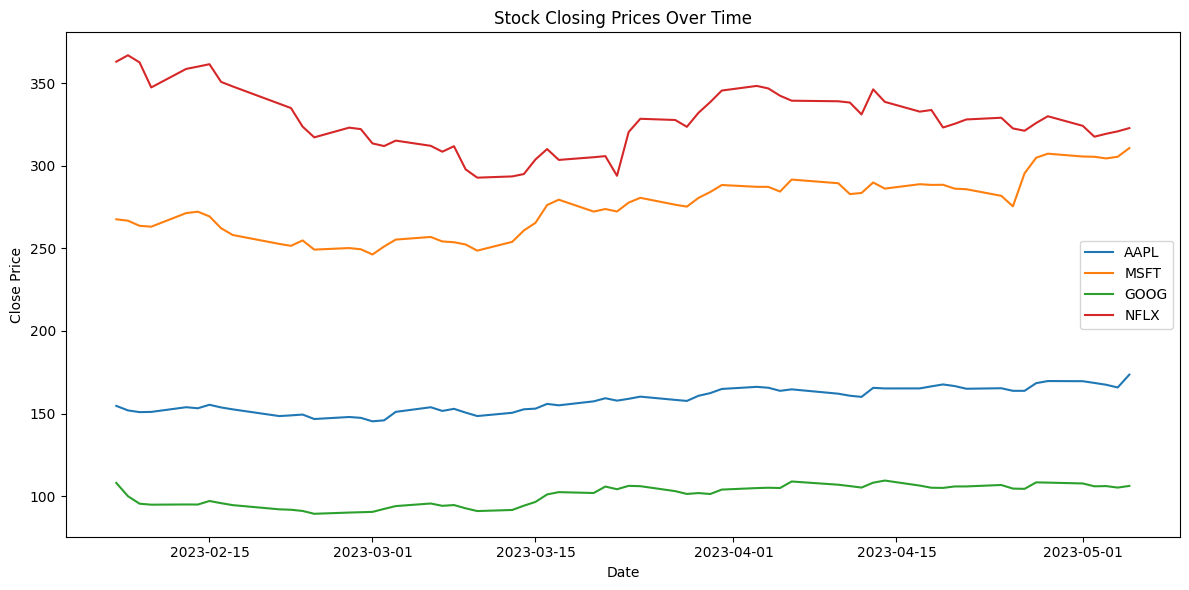

In [18]:

# Step 1: EDA - Plot stock prices
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
#Step 2: Feature Engineering - Moving Average and Volatility
df_sorted = df.sort_values(by=['Ticker', 'Date']).copy()
df_sorted['MA_10'] = df_sorted.groupby('Ticker')['Close'].transform(lambda x: x.rolling(10).mean())
df_sorted['Volatility_10'] = df_sorted.groupby('Ticker')['Close'].transform(lambda x: x.rolling(10).std())

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,Volatility_10
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN,NaN
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,NaN,NaN
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,NaN,NaN
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,NaN,NaN
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
181,NFLX,2023-05-01,329.440002,331.230011,318.089996,324.119995,324.119995,5341500,326.276999,3.868785
182,NFLX,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600,324.661996,3.795974
183,NFLX,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100,324.279996,4.144593
184,NFLX,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700,323.822995,4.263742


In [49]:
# New Feature: Daily Return
df_sorted['Daily_Return'] = df.groupby('Ticker')['Close'].pct_change()
df_sorted

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,Volatility_10,Daily_Return
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN,NaN,NaN
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,NaN,NaN,-0.017653
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,NaN,NaN,-0.006912
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,NaN,NaN,0.000928
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,NaN,NaN,0.018807
...,...,...,...,...,...,...,...,...,...,...,...
181,NFLX,2023-05-01,329.440002,331.230011,318.089996,324.119995,324.119995,5341500,326.276999,3.868785,-0.017610
182,NFLX,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600,324.661996,3.795974,-0.020270
183,NFLX,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100,324.279996,4.144593,0.005511
184,NFLX,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700,323.822995,4.263742,0.004635


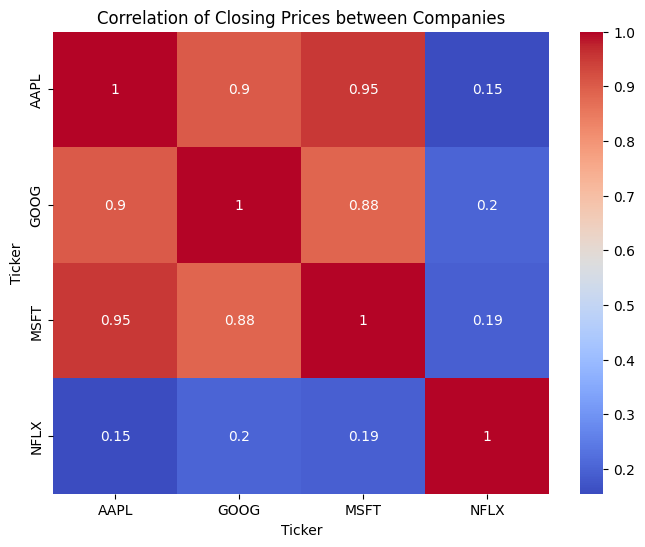

Ticker,AAPL,GOOG,MSFT,NFLX
Ticker,,,,
AAPL,1.000000,0.901662,0.953037,0.154418
GOOG,0.901662,1.000000,0.884527,0.201046
MSFT,0.953037,0.884527,1.000000,0.191273
NFLX,0.154418,0.201046,0.191273,1.000000


In [39]:

# Step 3: Correlation Analysis
pivot_df = df.pivot(index='Date', columns='Ticker', values='Close')
correlation_matrix = pivot_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation of Closing Prices between Companies")
plt.show()


In [44]:
# Step 4: Predictive Modeling - Simple Linear Regression on Apple Stock
aapl_df = df[df['Ticker'] == 'AAPL'].sort_values(by='Date').copy()
aapl_df['DayIndex'] = np.arange(len(aapl_df))  # create a time index
X = aapl_df[['DayIndex']]
y = aapl_df['Close']

,DayIndex
0,0
1,1
2,2
3,3
4,4
...,...
57,57
58,58
59,59
60,60


In [48]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
y_test


,Close
49,167.630005
50,166.649994
51,165.020004
52,165.330002
53,163.770004
54,163.759995
55,168.410004
56,169.679993
57,169.589996
58,168.539993


In [23]:
# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Prediction and Evaluation
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

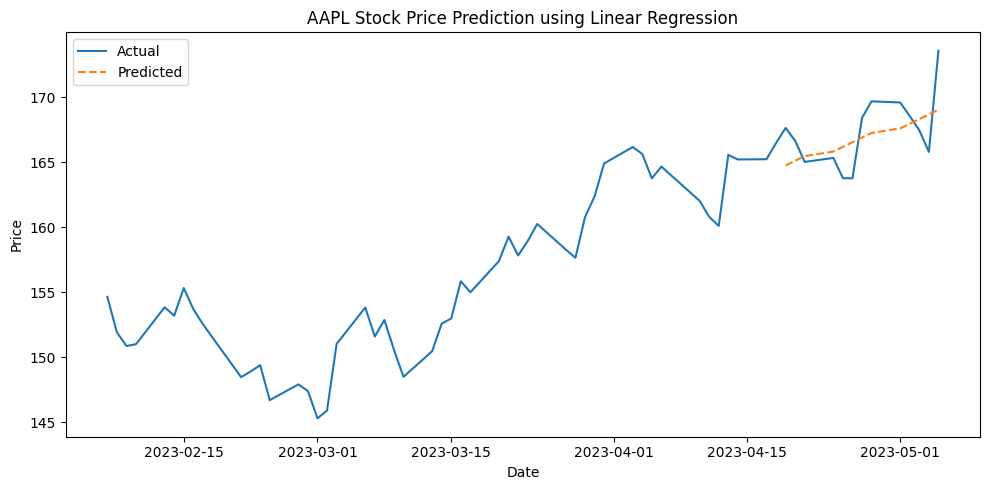

(None, 5.137436772483136)

In [25]:

# Plotting predictions
plt.figure(figsize=(10, 5))
plt.plot(aapl_df['Date'], aapl_df['Close'], label="Actual")
plt.plot(aapl_df.iloc[y_test.index]['Date'], y_pred, label="Predicted", linestyle='--')
plt.title("AAPL Stock Price Prediction using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show(), mse
